<a href="https://colab.research.google.com/github/CheekyLXIX/Custom-TensorFlow/blob/main/Custom_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip Fruits.zip

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 417 files belonging to 5 classes.
Found 50 files belonging to 5 classes.
Found 50 files belonging to 5 classes.


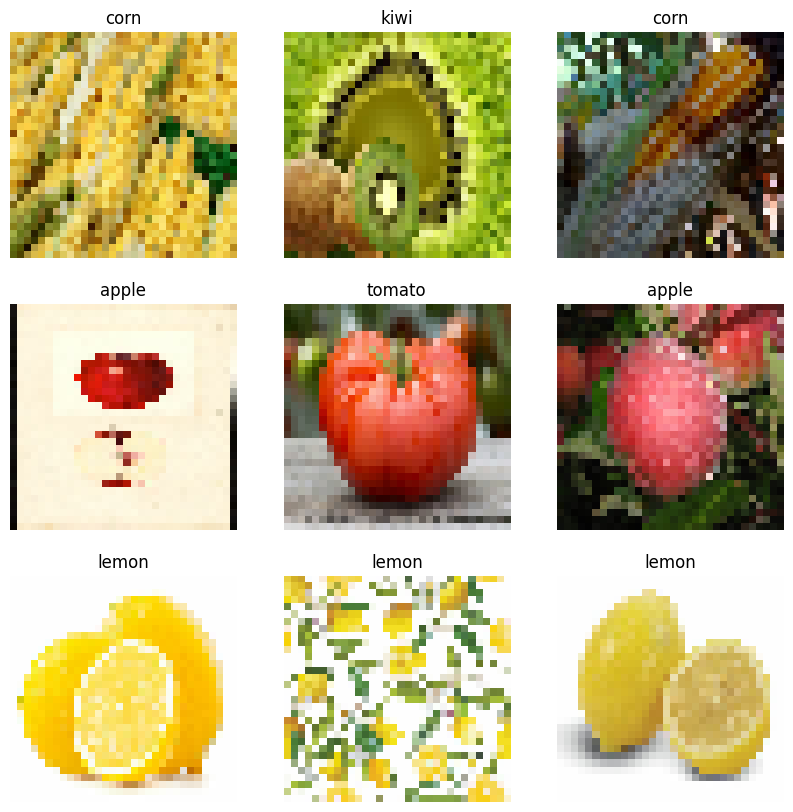

In [16]:
class_names = ["apple","corn", "kiwi","lemon","tomato"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(5)
    ]
)


In [10]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [12]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)

Epoch 1/20
21/21 [==============================] - 11s 354ms/step - loss: 0.6528 - accuracy: 0.7362 - val_loss: 0.4395 - val_accuracy: 0.8200
Epoch 2/20
21/21 [==============================] - 9s 316ms/step - loss: 0.5780 - accuracy: 0.7866 - val_loss: 0.4962 - val_accuracy: 0.8000
Epoch 3/20
21/21 [==============================] - 10s 310ms/step - loss: 0.5669 - accuracy: 0.7842 - val_loss: 0.4482 - val_accuracy: 0.7800
Epoch 4/20
21/21 [==============================] - 10s 358ms/step - loss: 0.5370 - accuracy: 0.8010 - val_loss: 0.4930 - val_accuracy: 0.7800
Epoch 5/20
21/21 [==============================] - 9s 341ms/step - loss: 0.4950 - accuracy: 0.8058 - val_loss: 0.4642 - val_accuracy: 0.8200
Epoch 6/20
21/21 [==============================] - 10s 379ms/step - loss: 0.4723 - accuracy: 0.8129 - val_loss: 0.5503 - val_accuracy: 0.7800
Epoch 7/20
21/21 [==============================] - 9s 315ms/step - loss: 0.4844 - accuracy: 0.8082 - val_loss: 0.3494 - val_accuracy: 0.8400
Ep

In [13]:
model.evaluate(test_ds)

3/3 [==============================] - 2s 9ms/step - loss: 0.1193 - accuracy: 0.9600


[0.11930231004953384, 0.9599999785423279]

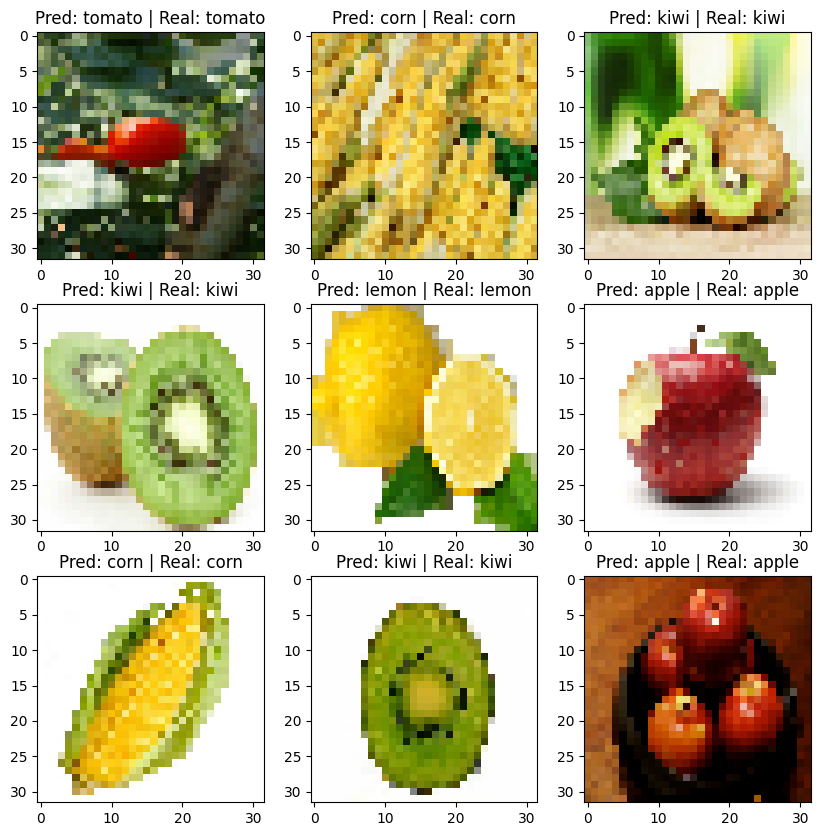

In [18]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)